## Análisis de las ventas de desodorantes en aerosol con Promociones

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
deodorants_df_with_promo_df = pd.read_csv("../clean_data/deodorants_with_promo.csv", parse_dates=['fecha_trans', 'fecha_desde', 'fecha_hasta'])

In [41]:
deodorants_df_with_promo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129522 entries, 0 to 129521
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   idb                     129522 non-null  int64         
 1   id_producto             129522 non-null  int64         
 2   fecha_trans             129522 non-null  datetime64[ns]
 3   fecha_desde             129522 non-null  datetime64[ns]
 4   fecha_hasta             129522 non-null  datetime64[ns]
 5   stock_unidades          129522 non-null  int64         
 6   venta_unidades          129522 non-null  int64         
 7   precio_unitario         129522 non-null  float64       
 8   sigue_prod_en_rol       129522 non-null  int64         
 9   cd_abast                129522 non-null  int64         
 10  mov_month               129522 non-null  int64         
 11  mov_year                129522 non-null  int64         
 12  mov_weekday             129522

In [42]:
deodorants_df_with_promo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129522 entries, 0 to 129521
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   idb                     129522 non-null  int64         
 1   id_producto             129522 non-null  int64         
 2   fecha_trans             129522 non-null  datetime64[ns]
 3   fecha_desde             129522 non-null  datetime64[ns]
 4   fecha_hasta             129522 non-null  datetime64[ns]
 5   stock_unidades          129522 non-null  int64         
 6   venta_unidades          129522 non-null  int64         
 7   precio_unitario         129522 non-null  float64       
 8   sigue_prod_en_rol       129522 non-null  int64         
 9   cd_abast                129522 non-null  int64         
 10  mov_month               129522 non-null  int64         
 11  mov_year                129522 non-null  int64         
 12  mov_weekday             129522

### Preguntas

- ¿Cuáles son los productos con mayor volumen de ventas?

In [91]:
product_grouped = deodorants_df_with_promo_df.groupby(['id_producto', 'desc_producto'])['venta_unidades'].sum().sort_values(ascending=False).nlargest(5)
product_grouped


id_producto  desc_producto                                                  
342686       glade desodorante de ambientes lavander nueva formula 751 cc       4964
429883       glade desodorante de ambientes ocean oasis nueva formula 751 cc    4082
240911       poett ambiental lavanda nuevo d 0.377 kg                           3582
342745       glade desodorante de ambientes jazmin nueva formula 0.751 cc       3378
242234       poett ambiental suavidad de algodon nuevo d 0.377 kg               3030
Name: venta_unidades, dtype: int64

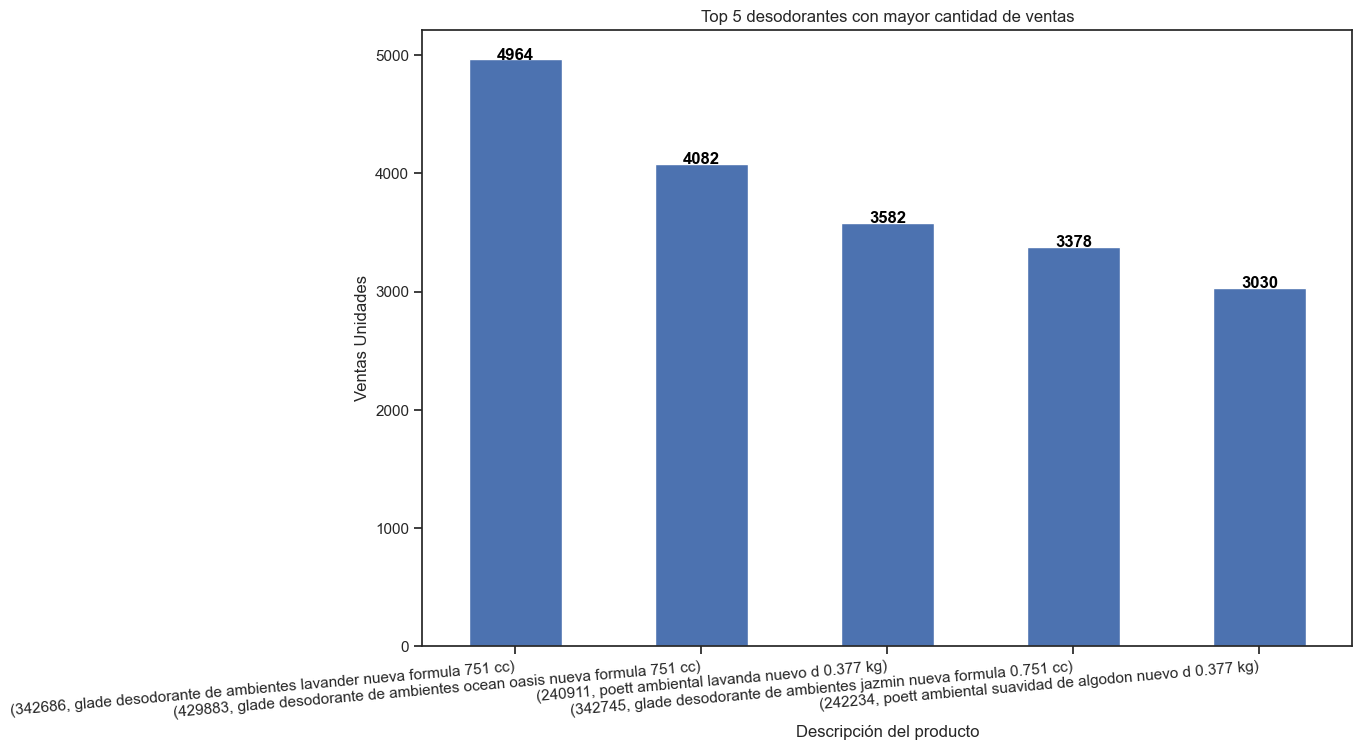

In [98]:
# set the seaborn theme
color = "blend:#7AB,#EDA"
sns.set_theme(style="whitegrid",
              font="Verdana",
              palette=color,
              font_scale=1)

sns.set_theme(style="ticks")

plt.figure(figsize=(12, 8))

# create a bar chart of the grouped data
ax = product_grouped.plot(kind='bar')

# set chart labels and title
ax.set_xlabel('Descripción del producto')
ax.set_ylabel('Ventas Unidades')
ax.set_title('Top 5 desodorantes con mayor cantidad de ventas')

# add labels to the bars
for i, v in enumerate(product_grouped):
    ax.text(i, v + 1, str(v), color='black', fontweight='bold', ha='center')

# rotate the x-axis labels by 5 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=5, ha='right')

# save the chart as a PNG image
plt.savefig('images/ventas_productos.png')

# display the chart
plt.show()

In [56]:
no_bs_candidates = deodorants_df_with_promo_df.query('idb.isnull()')
no_bs_candidates1 = deodorants_df_with_promo_df.query("idb==9231")
no_bs_candidates1

,idb,id_producto,fecha_trans,fecha_desde,fecha_hasta,stock_unidades,venta_unidades,precio_unitario,sigue_prod_en_rol,cd_abast,...,id_cadena,desc_cadena,desc_region,longitud,latitud,local,punto_dist,desc_producto,razon_social,id_region
4015,9231,292949,2019-06-23,2019-06-16,2019-06-23,0,0,45.66,1,9217,...,2,disco,buenos aires,-57.539134,-38.014727,1,0,glade toque glade toque glade toque desodorant...,s. c. johnson y son de arg. s.a.,1
4183,9231,484434,2019-06-23,2019-06-16,2019-06-23,4,0,416.52,1,9217,...,2,disco,buenos aires,-57.539134,-38.014727,1,0,lysoform lyso autom aparato + rep 175gr elimin...,s. c. johnson y son de arg. s.a.,1
4364,9231,228217,2019-06-23,2019-06-16,2019-06-23,0,0,45.66,1,9217,...,2,disco,buenos aires,-57.539134,-38.014727,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1
5162,9231,228217,2019-06-22,2019-06-16,2019-06-23,0,0,45.66,1,9217,...,2,disco,buenos aires,-57.539134,-38.014727,1,0,glade toque toque rep limon 12mlx12 limon repu...,s. c. johnson y son de arg. s.a.,1
5498,9231,292949,2019-06-22,2019-06-16,2019-06-23,0,0,45.66,1,9217,...,2,disco,buenos aires,-57.539134,-38.014727,1,0,glade toque glade toque glade toque desodorant...,s. c. johnson y son de arg. s.a.,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127981,9231,242231,2016-07-25,2016-07-24,2016-07-30,22,0,15.06,1,0,...,2,disco,buenos aires,-57.539134,-38.014727,1,0,poett ambiental primavera nuevo d 0.377 kg,clorox argentina s.a.,1
128044,9231,242234,2016-07-24,2016-07-24,2016-07-30,21,0,15.06,1,0,...,2,disco,buenos aires,-57.539134,-38.014727,1,0,poett ambiental suavidad de algodon nuevo d 0....,clorox argentina s.a.,1
128138,9231,242231,2016-07-24,2016-07-24,2016-07-30,22,0,15.06,1,0,...,2,disco,buenos aires,-57.539134,-38.014727,1,0,poett ambiental primavera nuevo d 0.377 kg,clorox argentina s.a.,1
128202,9231,240911,2016-07-24,2016-07-24,2016-07-30,25,0,15.06,1,0,...,2,disco,buenos aires,-57.539134,-38.014727,1,0,poett ambiental lavanda nuevo d 0.377 kg,clorox argentina s.a.,1
